<a href="https://colab.research.google.com/github/21JN1A4501/FMML_LAB_ASSIGNMENTS/blob/main/Module4_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent
### Module Coordinator: Jashn Arora

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation} 
\begin{equation} y_1= 3 \end{equation} 

and also add some noise to the data.

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

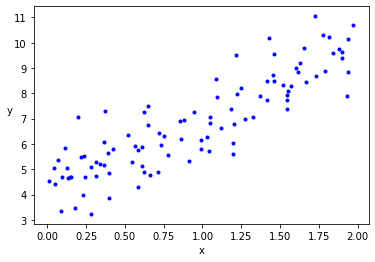

In [4]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2 
\end{equation}

In [5]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds 
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [6]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))
    
    for it in range(iterations):    
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)
        
    return y_pred, cost_history, y_pred_history    

Let's do 1000 iterations with a learning rate of 0.01. 
We will start with a random prediction.

In [10]:
goodlr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred,goodlr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.879
y_pred[1]: 3.067
Final error: 4203.169


# Plotting the error vs Number of iterations

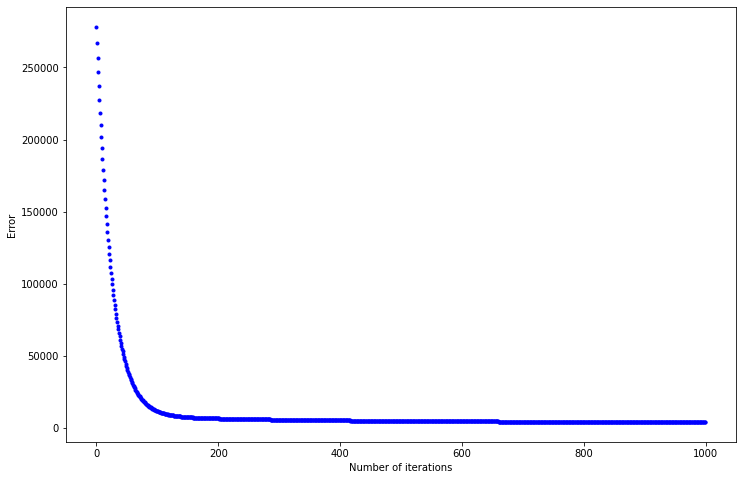

In [11]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

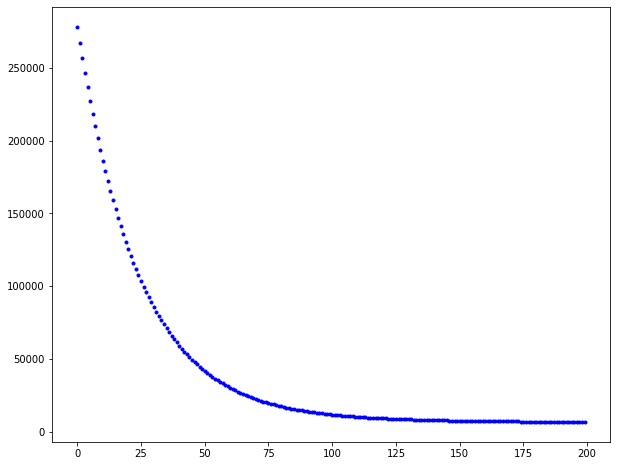

In [12]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [13]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    
    for it in range(iterations):
        cost = 0.0
        
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost
        
    return y_pred, cost_history

In [14]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.125
y_pred[1]: 2.735
Final error: 44.766


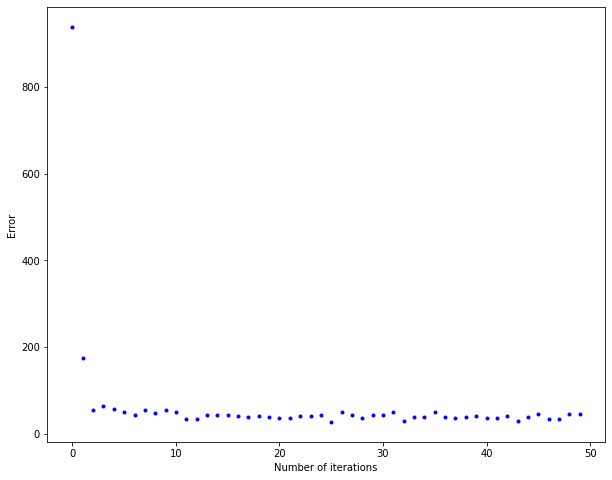

In [15]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [16]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)
    
    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]
            
            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost
        
    return y_pred, cost_history

In [18]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.193
y_pred[1]: 2.787
Final error: 804.872


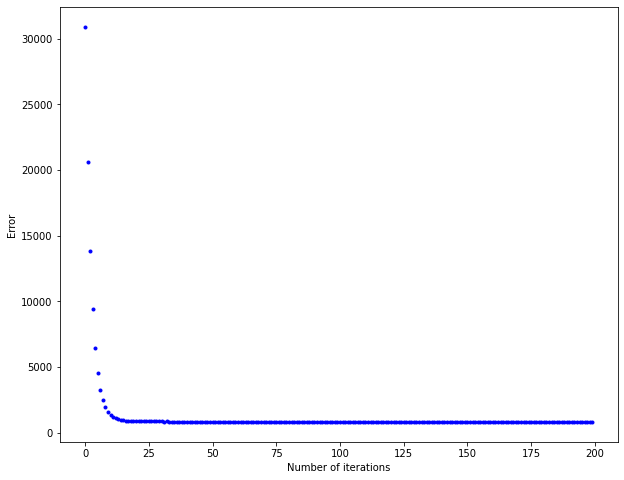

In [19]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

# **Solutions:**

# **1.Change batch size in mini-batch gradient descent.**

In [20]:
lr = 0.1
n_iter = 200

cost_history_list = []

# batch size
batch_size_list = [1, 20, 40, 60, 80, 100]

for bt_size in batch_size_list:
  """
  When,
    bt_sze = 1 -> Stocastic gradient
    bt_sze = m (100) -> Batch gradient
  """
  y_pred = np.random.randn(2,1)
  y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, learning_rate=lr, iterations=n_iter, batch_size=bt_size)

  cost_history_list.append(cost_history)

  print(f"Batch Size = {bt_size}")
  print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
  print('Final error: {:0.3f}'.format(cost_history[-1]))
  print("====================================")

Batch Size = 1
y_pred[0]: 4.159
y_pred[1]: 2.819
Final error: 40.288
Batch Size = 20
y_pred[0]: 4.154
y_pred[1]: 2.825
Final error: 806.943
Batch Size = 40
y_pred[0]: 4.190
y_pred[1]: 2.791
Final error: 1385.366
Batch Size = 60
y_pred[0]: 4.230
y_pred[1]: 2.756
Final error: 2116.749
Batch Size = 80
y_pred[0]: 4.184
y_pred[1]: 2.798
Final error: 2460.962
Batch Size = 100
y_pred[0]: 4.210
y_pred[1]: 2.775
Final error: 4032.969


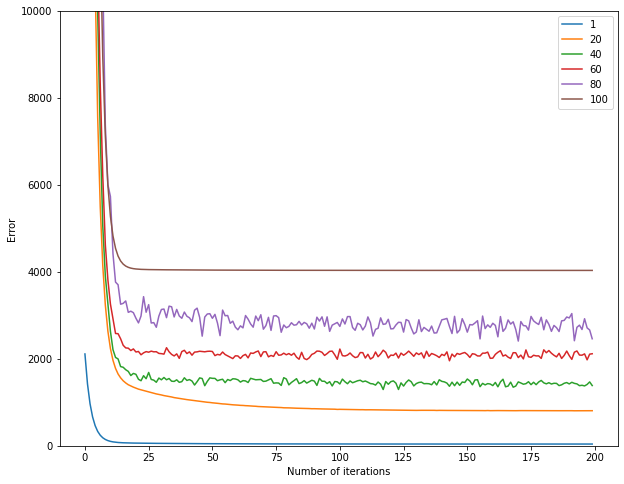

In [21]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

for bt_size, cost_history in zip(batch_size_list, cost_history_list):
  ax.plot(range(n_iter), cost_history, label=str(bt_size))

plt.ylim([0, 10000])

plt.legend()
plt.show()

# **2.Test all the three out on real datasets.**

Medical Cost Personal Datasets: Insurance Forecast by using Linear Regression. [kaggle](https://)

In [22]:

!gdown --id 1WGdO18u8FIlmUsLsak9sZ7s7Mw7mkKCz

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1WGdO18u8FIlmUsLsak9sZ7s7Mw7mkKCz
To: /content/insurance.csv
100% 55.6k/55.6k [00:00<00:00, 42.5MB/s]


In [24]:
import pandas as pd
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
# Changing Text to numerical values
## sex 
one_hot = pd.get_dummies(df["sex"])
df = df.join(one_hot)

## smoker
one_hot = pd.get_dummies(df["smoker"])
df = df.join(one_hot)

## region
one_hot = pd.get_dummies(df["region"])
df = df.join(one_hot)

# Drop Unwanded columns
df = df.drop(["sex", "smoker", "region"], axis=1)
df.head()

,age,bmi,children,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [26]:
df = df.sample(1000, random_state=42)
X_df = df["bmi"].to_numpy()
y_df = df["charges"].to_numpy()

In [27]:
# Standardization
std = X_df.std() 
mean = X_df.mean()
X_df = (X_df - mean) / std

std = y_df.std() 
mean = y_df.mean()
y_df = (y_df - mean) / std

In [28]:
X_df.shape

(1000,)

In [29]:
X_df = np.expand_dims(X_df, axis=1)
X_df.shape
     

(1000, 1)

Text(0, 0.5, 'y')

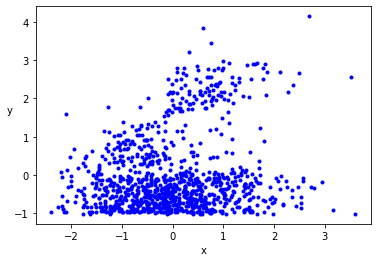

In [30]:

plt.plot(X_df, y_df, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

In [31]:
lr = 10e-7
n_iter = 200

cost_history_list = []

# batch size
batch_size_list = [1, 10, 100, X_df.shape[0]]

for bt_size in batch_size_list:
  """
  When,
    bt_sze = 1 -> Stocastic gradient
    bt_sze = m (100) -> Batch gradient
  """
  y_pred = np.random.randn(2, 1)
  y_pred, cost_history = minibatch_gradient_descent(X_df, y_df, y_pred, learning_rate=lr, iterations=n_iter, batch_size=bt_size)

  cost_history_list.append(cost_history)

  if bt_size == 1:
    gd_name = "Stocastic Gradient Descent"
  elif bt_size == batch_size_list[-1]:
    gd_name = "Batch Gradient Descent"
  else:
    gd_name = "Mini-Batch Gradient Descent"

  print(f"{gd_name}")
  print(f"Batch Size = {bt_size}")
  print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
  print('Final error: {:0.3f}'.format(cost_history[-1]))
  print("====================================")

Stocastic Gradient Descent
Batch Size = 1
y_pred[0]: 0.610
y_pred[1]: -1.221
Final error: 1666.352
Mini-Batch Gradient Descent
Batch Size = 10
y_pred[0]: 1.054
y_pred[1]: -0.920
Final error: 150528.222
Mini-Batch Gradient Descent
Batch Size = 100
y_pred[0]: 1.161
y_pred[1]: -0.085
Final error: 11768430.885
Batch Gradient Descent
Batch Size = 1000
y_pred[0]: 0.428
y_pred[1]: -1.293
Final error: 1427382253.517


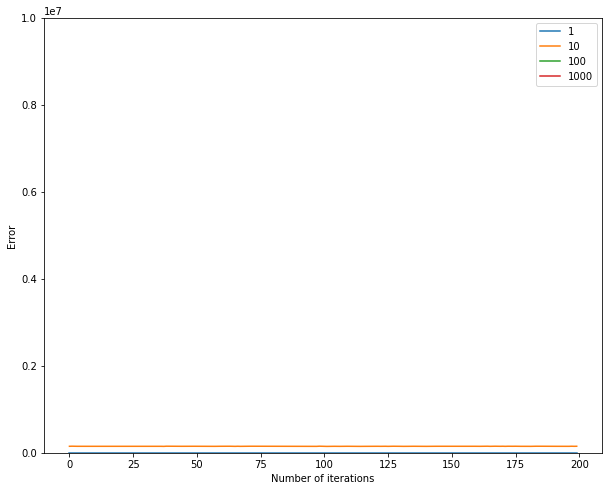

In [32]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

for bt_size, cost_history in zip(batch_size_list, cost_history_list):
  ax.plot(range(n_iter), cost_history, label=str(bt_size))

plt.ylim([0, 10e6])

plt.legend()
plt.show()

# 3.Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

In [33]:
lr_rates = [0.1, 0.01, 0.0001, 10e-4, 10e-5]
n_iter = 1000

cost_history_all = []

for lr in lr_rates:

  d = {}

  print(f"Learning Rate: {lr}")
  # Batch 
  y_pred = np.random.randn(2,1)
  X_b = np.c_[np.ones((len(X), 1)), X]
  y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)
  d["bgd"] = cost_history

  print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
  print('Batch GD: Final error: {:0.3f}'.format(cost_history[-1]))

  # Stocastic
  y_pred = np.random.randn(2, 1)
  X_b = np.c_[np.ones((len(X), 1)), X]
  y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)
  d["sgd"] = cost_history

  print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
  print('SGD: Final error: {:0.3f}'.format(cost_history[-1]))


  # Mini Batch
  y_pred = np.random.randn(2,1)
  y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)
  d["mgd"] = cost_history

  print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
  print('Mini-Batch GD Final error: {:0.3f}'.format(cost_history[-1]))

  cost_history_all.append(d)

  print("=====================================")

Learning Rate: 0.1
y_pred[0]: 4.215
y_pred[1]: 2.770
Batch GD: Final error: 4032.923
y_pred[0]: 4.212
y_pred[1]: 2.763
SGD: Final error: 40.981
y_pred[0]: 4.215
y_pred[1]: 2.770
Mini-Batch GD Final error: 806.165
Learning Rate: 0.01
y_pred[0]: 3.971
y_pred[1]: 2.986
Batch GD: Final error: 4123.035
y_pred[0]: 4.230
y_pred[1]: 2.757
SGD: Final error: 31.749
y_pred[0]: 3.941
y_pred[1]: 3.012
Mini-Batch GD Final error: 829.259
Learning Rate: 0.0001
y_pred[0]: 0.807
y_pred[1]: 0.159
Batch GD: Final error: 187901.118
y_pred[0]: 1.469
y_pred[1]: 0.099
SGD: Final error: 1508.151
y_pred[0]: 2.295
y_pred[1]: 0.667
Mini-Batch GD Final error: 17554.919
Learning Rate: 0.001
y_pred[0]: 3.228
y_pred[1]: 2.831
Batch GD: Final error: 8357.580
y_pred[0]: 3.106
y_pred[1]: 2.923
SGD: Final error: 93.667
y_pred[0]: 3.439
y_pred[1]: 2.366
Mini-Batch GD Final error: 2201.089
Learning Rate: 0.0001
y_pred[0]: 0.759
y_pred[1]: 0.665
Batch GD: Final error: 159537.175
y_pred[0]: 0.847
y_pred[1]: 1.986
SGD: Final 

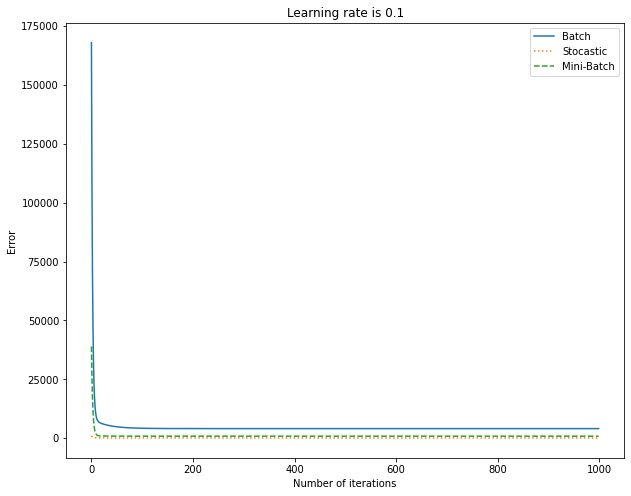

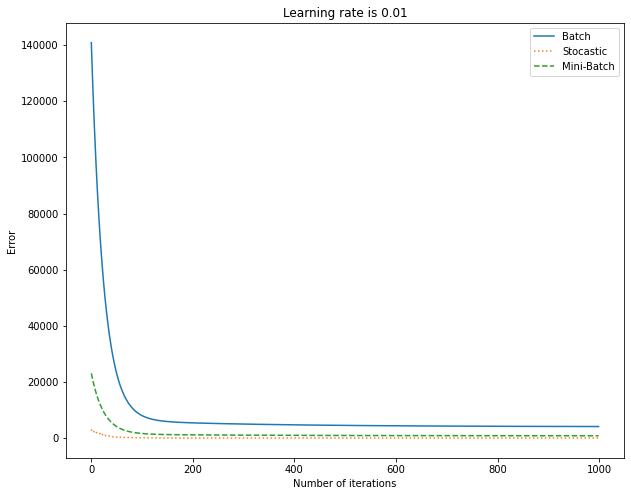

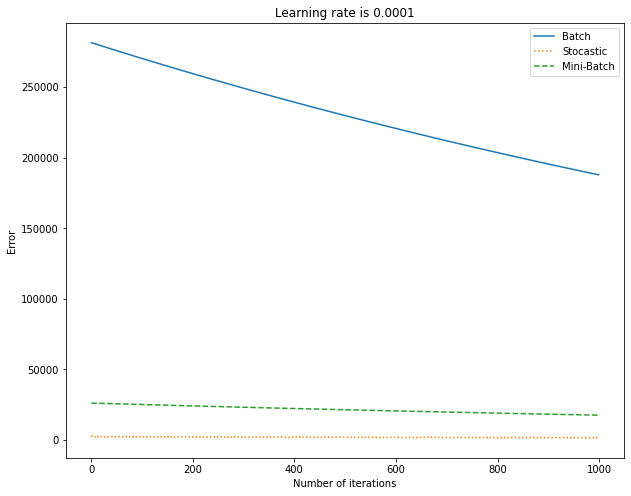

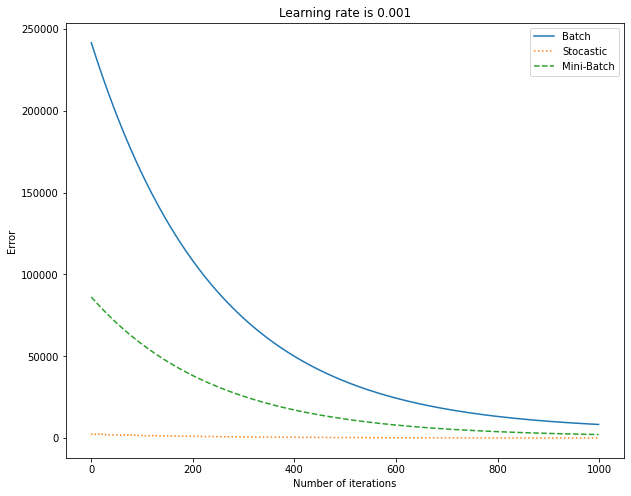

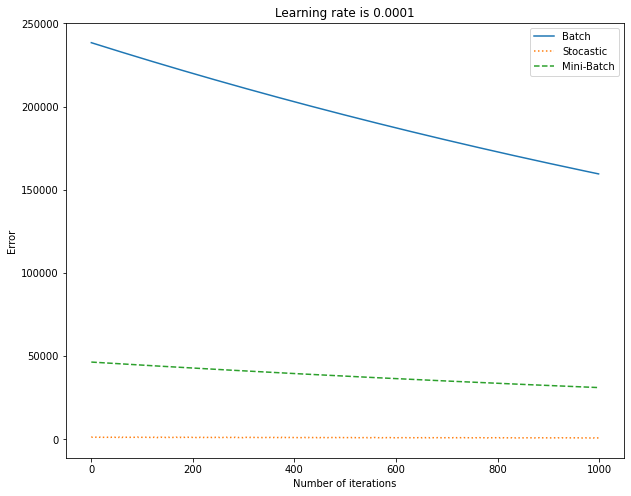

In [34]:
for lr, cost_history in zip(lr_rates, cost_history_all):
  fig, ax = plt.subplots(figsize=(10,8))

  ax.set_title(f"Learning rate is {lr}")
  ax.set_ylabel('Error')
  ax.set_xlabel('Number of iterations')
  y_pred = np.random.randn(2,1)

  ax.plot(range(n_iter), cost_history["bgd"], label="Batch", linestyle="solid")
  ax.plot(range(n_iter), cost_history["sgd"], label="Stocastic", linestyle="dotted")
  ax.plot(range(n_iter), cost_history["mgd"], label="Mini-Batch", linestyle="dashed")

  # plt.ylim([0, 10e6])

  plt.legend()
  plt.show()

# We can see that as explained above SGD converge faster in all the cases. For BGD we need more number of iterations compared to SGD and MBGD. MBGD falls somewhat in middle of SGD and BGD